# [Sklearn Profesional](https://scikit-learn.org/stable/)

Sklearn surge en el 2007 desde un reto de Google Summer of Code, nace como herramienta universitaria pero se expande para ser una de las librerías más usadas.

![](https://static.platzi.com/media/user_upload/ml_map-ce718276-6dfd-4392-ac03-c9b74cb0311c.jpg)

**¿Por qué escogerlo?**

- Curva de aprendizaje suave
- Versátil
- Comunidad de soporte
- Usado en producción
- Integración con librerías externas

Los módulos principales son:

- Clasificación
- Regresión
- Clustering
- Preprocesamiento
- Reducción de dimensionalidad
- Selección del modelo

## ¿Cómo aprenden las máquinas

Dependiendo de la naturaleza de los datos y el objetivo del modelado, se elige entre:

- Aprendizaje supervisado: Con los datos que se tienen, se extraen patrones según el target.
- Aprendizaje por refuerzo: Si los datos no tienen un objetivo claro, pero si se puede evaluar si una decisión tomada es buena o mala-
- Aprendizaje no supervizado: Si no se sabe que esperar de los datos y se quiere explorar una estructura o relaciones, este aprende naturalmente de los datos.
- Algoritmos evolutivos: Es una serie de algoritmos heuristicos, en donde en tu espacio de soluciones se explora las mejores candidatos, según se optimice cierta función de costo. Por ejemplo, se usa en la industría automotriz o de diseño aeroespacial para encontrar el mejor diseño que minimice, por ejemplo, la resistencia al aire.
- Lógica difusa: Es una generalización de la lógica clásica, pero en lugar de tener solo dos condiciones (verdadero, falso) [principio de tercero excluido], se tienen condiciones de verdad continuas. Por ejemplo, si 1 representa verdadero, y 0 representa falso, en la lógica difusa, el grado de verdad ahora puede tomar valores en el intervalo continuo de [0, 1]. Este enfoque tenía mucho auge en sistemas de control y robotica, antes del auge de las redes neuronales.
- Agentes: Para sistemas cuyas propiedades se puede describir por la interacción de agentes, se utiliza este enfoque para encontrar o describir comportamientos en el colectivo. (Por ejemplo, los mercados financieros compuestos por agentes economicos, vendedores y compradores, etc). La física estadística y los sistemas complejos también se ayudan de este enfoque.
- Sistemas expertos

## ¿Cuando usarlo?

- No es una herramienta de Computer Vision
- No se puede correr en GPUs
- No es una herramienta de estadística avanzada
- No es muy flexible en Deep Learning

Es muy usado para clasificación, para etiquetar los datos según una categoría, para regresión, cuando la variable a predecir es continua y para clustering, agrupar datos según patrones internos

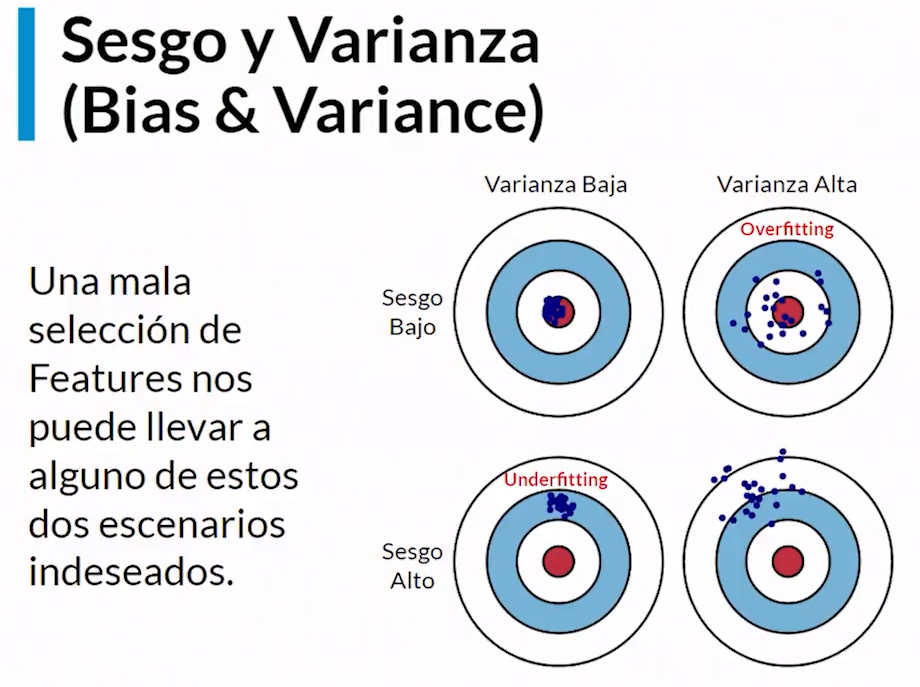

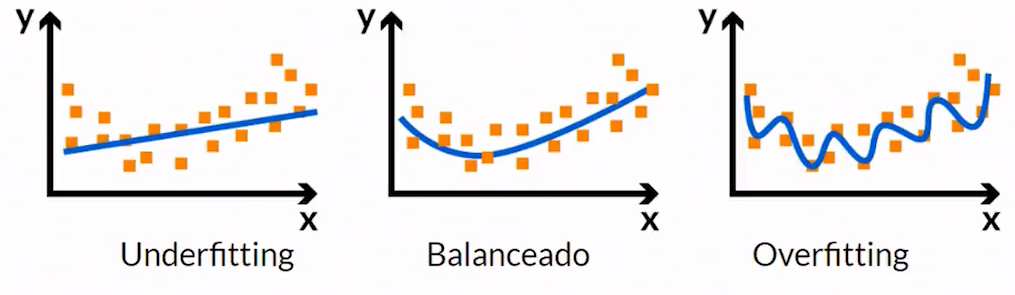

Para evitar overfitting se puede usar PCA, regularización y balanceo

## Prácticas

### PCA

Se usa cuando:

- El número de variables es muy grande
- Hay alta correlación entre los features
- Nos está dando overfitting
- Alto coste computacional

El algoritmo intenta destacar solo los datos importantes, teniendo en cuenta la matriz de covarianza, luego los vectores propios de esta para encontrar que tan fuerte son los features

#### Kernel y KPCA

Recordemos que los kernels son funciones matemáticas que toma mediciones que se comportan de manera no lineal y las proyecta en un espacio dimensional más grande donde sean linealmente separables.

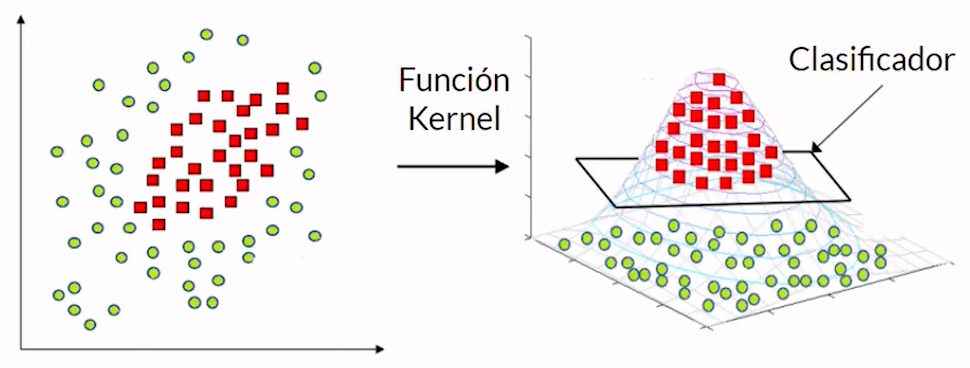

#### Preparación de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_heart = pd.read_csv("./data/heart.csv")
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Normalizar los datos

In [3]:
df_features = StandardScaler().fit_transform(df_heart.drop("target", axis=1))
df_target = df_heart["target"]
df_features

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    df_target, 
                                                    test_size=0.3,
                                                    random_state=42) 

#### Implementación de PCA

In [5]:
pca = PCA(n_components=3) # Si no se pasa nada a n es min(muestras, features)
pca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

kpca = KernelPCA(n_components=4, kernel="poly")
kpca.fit(X_train)

KernelPCA(kernel='poly', n_components=4)

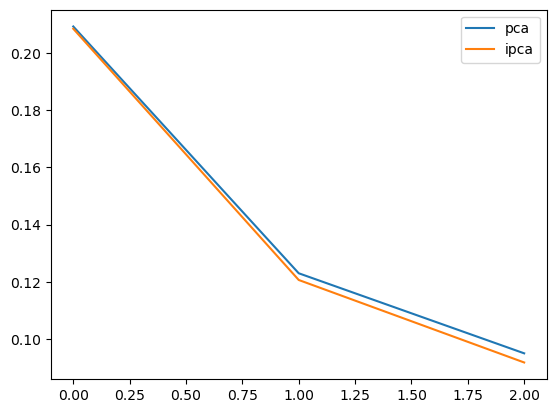

In [6]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_, label="pca")
plt.plot(range(len(ipca.explained_variance_)), ipca.explained_variance_ratio_, label="ipca")
plt.legend()
plt.show()

In [7]:
logistic_pca = LogisticRegression(solver="lbfgs")

df_train_pca = pca.transform(X_train)
df_test_pca = pca.transform(X_test)

logistic_pca.fit(df_train_pca, y_train)
logistic_pca.score(df_test_pca, y_test)

0.7857142857142857

In [8]:
logistic_ipca = LogisticRegression(solver="lbfgs")

df_train_ipca = ipca.transform(X_train)
df_test_ipca = ipca.transform(X_test)

logistic_ipca.fit(df_train_ipca, y_train)
logistic_ipca.score(df_test_ipca, y_test)

0.8051948051948052

In [9]:
logistic_kpca = LogisticRegression(solver="lbfgs")

df_train_kpca = kpca.transform(X_train)
df_test_kpca = kpca.transform(X_test)

logistic_kpca.fit(df_train_kpca, y_train)
logistic_kpca.score(df_test_kpca, y_test)

0.7987012987012987

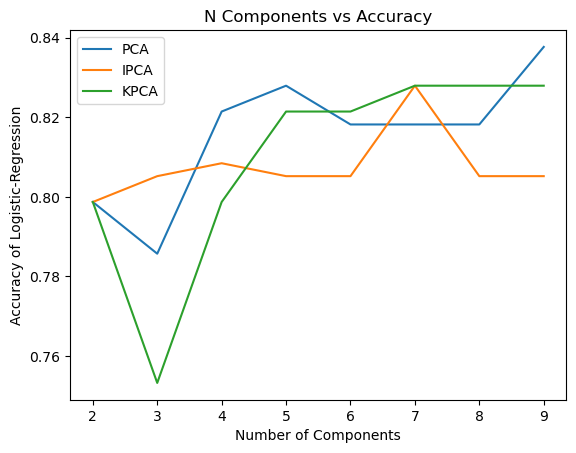

In [10]:
# Configuracion de la regresión logística
logistic = LogisticRegression(solver='lbfgs')

pca_data = {'accuracy': [],
            'n_components': []}
ipca_data = {'accuracy': [],
            'n_components': []}
kpca_data = {'accuracy': [],
            'n_components': []}
# PCA
for n in range(2, 10):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    df_train = pca.transform(X_train)
    df_test = pca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    
    pca_data['accuracy'].append(acccuracy)
    pca_data['n_components'].append(n)

    # IPCA
    ipca = IncrementalPCA(n_components=n, batch_size=10)
    ipca.fit(X_train)
    df_train = ipca.transform(X_train)
    df_test = ipca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    
    ipca_data['accuracy'].append(acccuracy)
    ipca_data['n_components'].append(n)
    
    # KPCA
    kpca = KernelPCA(n_components=n, kernel="poly")
    kpca.fit(X_train)
    df_train = kpca.transform(X_train)
    df_test = kpca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    
    kpca_data['accuracy'].append(acccuracy)
    kpca_data['n_components'].append(n)


plt.plot(pca_data['n_components'], pca_data['accuracy'], label='PCA')
plt.plot(ipca_data['n_components'], ipca_data['accuracy'], label='IPCA')
plt.plot(kpca_data['n_components'], kpca_data['accuracy'], label='KPCA')
plt.title('N Components vs Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy of Logistic-Regression')
plt.legend()
plt.show()

### Regularización

Intenta reducir la complejidad del modelo, dandonde penalizaciones aplicada a sus variables más irrelevantes, esto con el fin de reducir el overfitting.

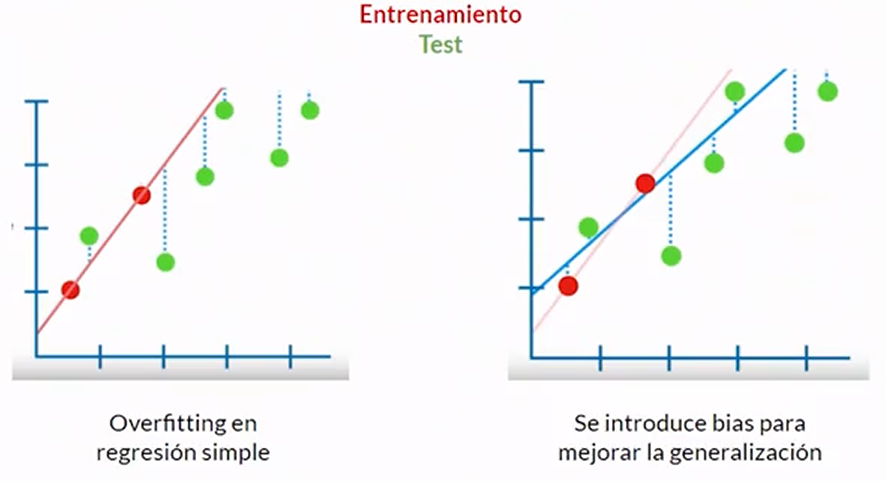

Se usa una medida de pérdida para saber que tan alejados estamos del valor real, mientras menor sea la pérdida, menor error hay

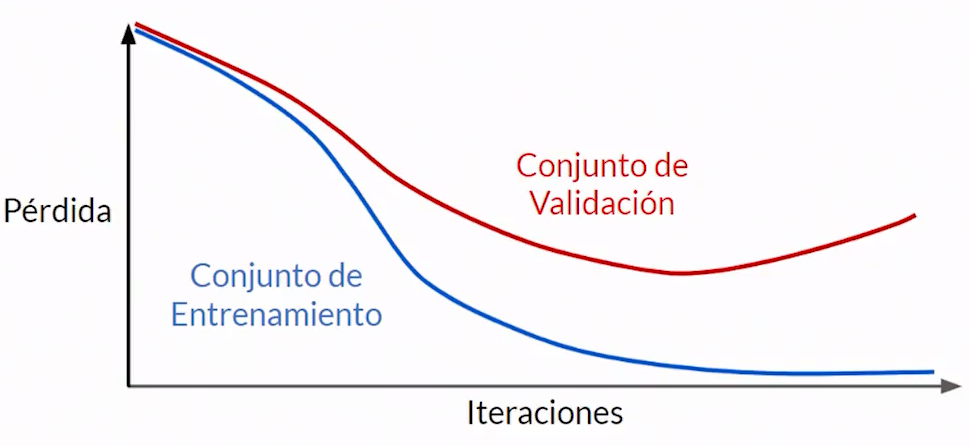


In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_csv("./data/whr2017.csv")
df.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [13]:
df.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [14]:
X = df[["gdp", "family", "lifexp", "freedom", "corruption", "generosity", "dystopia"]]
y = df["score"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25)

In [16]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mean_squared_error(y_test, y_pred_lr)

9.158294899481991e-08

In [17]:
lr.coef_

array([1.00021402, 0.99983866, 0.99982421, 0.9999434 , 0.99967971,
       1.00023645, 0.9999928 ])

#### L1 Lasso

Reduce la complejidad a través de la eliminación de features que no aportan demasiado al modelo.

$$\hat{\beta}=argmin_{\beta}\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij}\right)^2+\lambda\sum_{j=1}^p|\beta_j|$$

Es usado cuando hay pocos features relacionados con el target

In [18]:
lasso = Lasso(alpha=0.02).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mean_squared_error(y_test, y_pred_lasso)

0.06283995574652002

In [19]:
lasso.coef_

array([1.40837703, 0.92268846, 0.3235927 , 0.55647533, 0.        ,
       0.29312974, 0.94611639])

#### L2 Ridge

Reduce la complejidad disminuyendo el impacto de ciertos features a nuestro modelo.

$$\hat{\beta}=argmin_{\beta}\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij}\right)^2+\lambda\sum_{j=1}^p\beta_j^2$$

Si hay muchos feratures relacionados con el target

In [20]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mean_squared_error(y_test, y_pred_ridge)

0.006558045951971263

In [21]:
ridge.coef_

array([1.10100115, 0.96663408, 0.82995845, 0.84918974, 0.64331717,
       0.76827877, 0.97476502])

#### ElasticNet

Es una combinación de ambos

### Valores atípicos

Puede identificarse de varias formas:

- Z-Score: Mide la distancia de un punto dado a la media
- DBSCAN: Consiste en considerar a zonas muy densas como clusters, mientras que los puntos que carecen de 'vecinos' no pertenecen a ningún conjunto y por lo tanto se clasifican como ruido (o outliers).
Una ventaja de está técnica es que no se requiere que se especifique el número de clusters (como en K-means, por ejemplo), en cambio se debe especificar un número mínimo de datos que constituye un cluster y un parámetro epsilon que está relacionado con el espacio entre vecinos.

![gif.gif](https://dashee87.github.io/images/DBSCAN_search.gif
)
- Si $q<Q1-1.5*IQR$ ó $q>Q3+1.5*IQR$

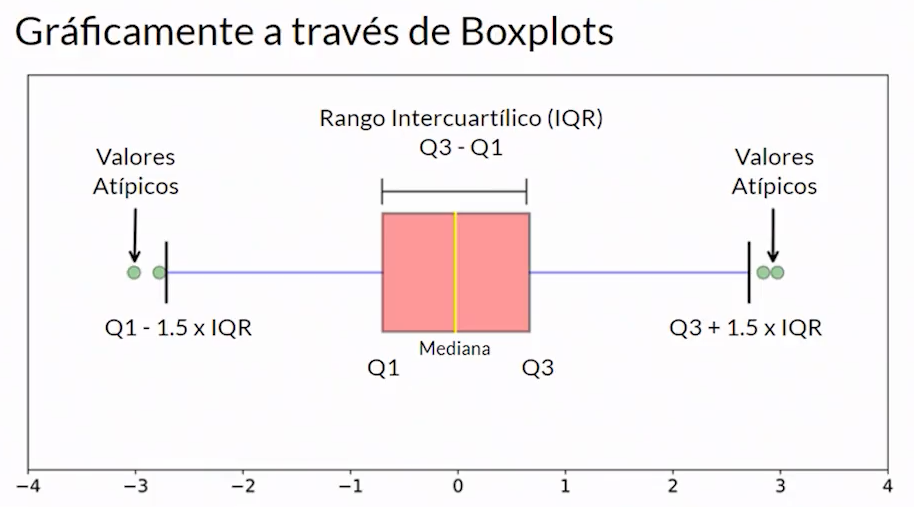

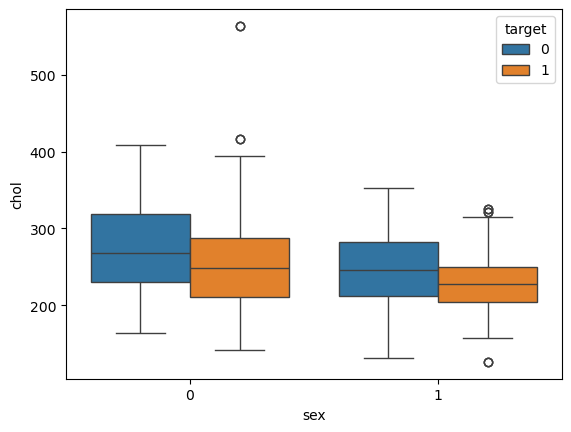

In [22]:
import seaborn as sns
sns.boxplot(df_heart, x="sex", y="chol", hue = df_heart.target)
plt.show()

### Regresiones robustas

Pueden tratar valores atípicos

In [23]:
from sklearn.linear_model import RANSACRegressor, HuberRegressor
from sklearn.svm import SVR

In [24]:
df_happy = pd.read_csv("./data/felicidad_corrupt.csv")
df_happy.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [25]:
X = df.drop(['country', 'score'], axis=1)
y = df[['score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
estimators = {
        'SVR': SVR(gamma='auto', C=1.0, epsilon=0.1),
        'RANSAC': RANSACRegressor(),
        'HUBER': HuberRegressor(epsilon=1.35)
    }

In [27]:
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(name)
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("="*60)

SVR
MSE: 0.024636332906412158
RANSAC
MSE: 1.189915081373865e-19
HUBER
MSE: 2.7241525027635896e-06


c:\Users\shani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shani\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### RANSAC

Selecciona una muestra aleatoria de los datos asumiendo que esa muestra se encuentra dentro de los valores inliners, con estos datos se entrena el modelo y se compara su comportamiento con respecto a los otros datos. Este procedimiento se repite tantas veces como se indique y al finalizar el algoritmo escoge la combinación de datos que tenga la mejor cantidad de inliners, donde los valores atípicos puedan ser discriminados de forma efectiva

![](https://bitesofcode.files.wordpress.com/2017/09/ransac1.png?w=625)

#### Huber Reggresor

No elimina los valores atípicos sino que los penaliza. Realiza el entrenamiento y si el error absoluto de la perdida alcanza cierto umbral (epsilon) los datos son tratados como atípicos. El valor por defecto de epsilon es 1.35 ya que se ha demostrado que logra un 95% de eficiencia estadística.

### Método de ensamble

- Combinar diferentes métodos de ML con diferentes configuraciones y aplicar un método para lograr un consenso.
- La diversidad es una muy buena opción
- Los métodos de ensamble se han destacado por ganar muchas competencias de ML.

#### Bagging

Bootstrap AGGregation

1. Se crean particiones aleatoriamentes (uniformes y con reemplazo) del conjunto de datos original
2. Para cada una se entrenan modelos, iguales o distintos
3. Luego se busca un método para tomer una decisión consensuada, por ejemplo el de votación

Dentro de este método observamos por ejemplo el Random Forest

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
df_heart = pd.read_csv("./data/heart.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [30]:
X = df_heart.drop(["target"], axis=1)
y = df_heart["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.35,
                                                    random_state=0)

In [31]:
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.7298050139275766

In [32]:
bag = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                        n_estimators=50).fit(X_train, y_train)
bag_pred = bag.predict(X_test)
accuracy_score(y_test, bag_pred)

c:\Users\shani\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7883008356545961

#### Boosting

Es un método secuencial que busca fortalecer gradualmente un modelo de aprendizaje usando siempre el error residual de las etapas anteriores, el resultado final también se consiguen por me dio de un consenso.

Dentro de los más comunes está AdaBoost, GradientTreeBoosting y XGBoost

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)
boost_pred = boost.predict(X_test)
accuracy_score(y_test, boost_pred)

0.9498607242339833

### Clustering

Recordemos que este busca encontrar los patrones de los datos por medio de agrupaciones, este se usa por ejemplo cuando no se tiene etiquetas de los datos o para identificar valores atípicos. Hay dos casos de aplicación:

- Cuando sabemos los grupos "k" que queremos agrupar (K-means, Spectral Clustering)
- Cuando queremos encontrar "k" (Meanshift, Clustering jerárquico, DBSCAN)

#### KMeans

In [35]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

In [36]:
df_candy = pd.read_csv("./data/candy.csv")
X = df_candy.drop(["competitorname"], axis=1)
df_candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [37]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)
print(f'Total de centros: {len(kmeans.cluster_centers_)}')
print("="*64)
print(f'Predicciones: {kmeans.predict(X)}')

c:\Users\shani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\shani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Total de centros: 4
Predicciones: [0 0 1 2 3 3 3 1 2 1 2 1 1 2 2 2 2 2 3 1 3 2 3 3 3 3 1 3 0 2 2 3 0 0 2 3 0
 3 0 2 3 3 0 0 1 2 2 0 2 2 2 0 0 0 0 1 0 1 2 1 3 3 2 2 0 3 3 3 0 1 1 1 1 3
 3 2 2 3 2 0 2 2 2 2 3]


In [38]:
df_candy['group'] = kmeans.predict(X)

df_candy['group'].value_counts()

group
2    28
3    24
0    18
1    15
Name: count, dtype: int64

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

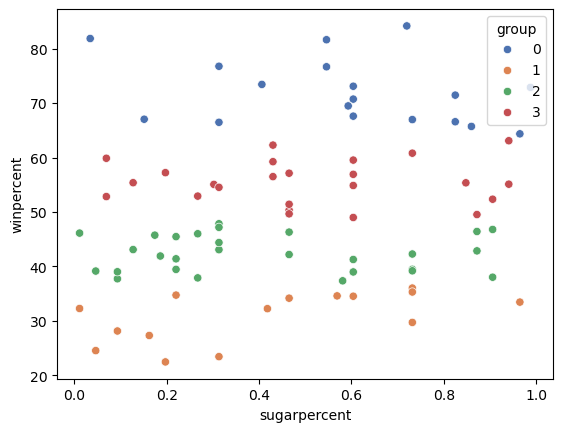

In [39]:
sns.scatterplot(data=df_candy, x="sugarpercent", y="winpercent", hue="group", palette="deep")

c:\Users\shani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


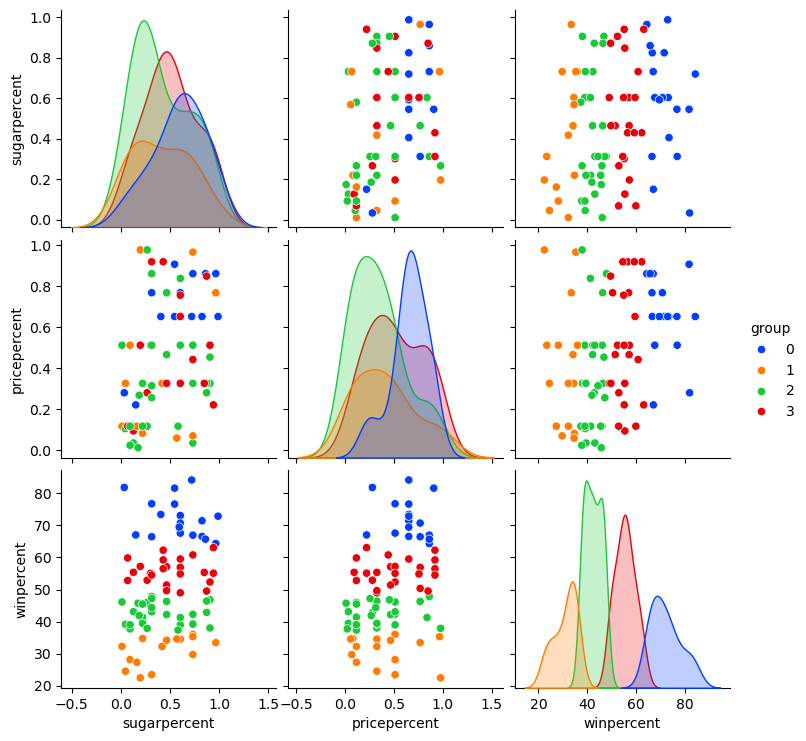

In [40]:
sns.pairplot(df_candy[['sugarpercent', 'pricepercent', 'winpercent', 'group']], hue='group', palette="bright")

#### MeanShift

In [41]:
from sklearn.cluster import MeanShift

In [42]:
ms = MeanShift().fit(df_candy.drop(["competitorname", "group"], axis=1))
ms.labels_

array([2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1],
      dtype=int64)

In [43]:
ms.cluster_centers_

array([[2.25000000e-01, 5.75000000e-01, 1.00000000e-01, 2.50000000e-02,
        5.00000000e-02, 2.50000000e-02, 3.00000000e-01, 1.00000000e-01,
        5.50000000e-01, 4.57599993e-01, 3.67824996e-01, 4.10442122e+01],
       [4.68750000e-01, 5.00000000e-01, 1.25000000e-01, 1.56250000e-01,
        9.37500000e-02, 6.25000000e-02, 1.25000000e-01, 3.12500000e-01,
        5.31250000e-01, 4.57281243e-01, 4.67874998e-01, 5.21138597e+01],
       [8.26086957e-01, 1.73913043e-01, 3.04347826e-01, 3.04347826e-01,
        1.73913043e-01, 1.73913043e-01, 0.00000000e+00, 5.21739130e-01,
        4.34782609e-01, 5.81391293e-01, 6.38086963e-01, 6.47120799e+01]])

In [44]:
df_candy["meanshift"] = ms.labels_

In [45]:
df_candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,group,meanshift
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,3,1


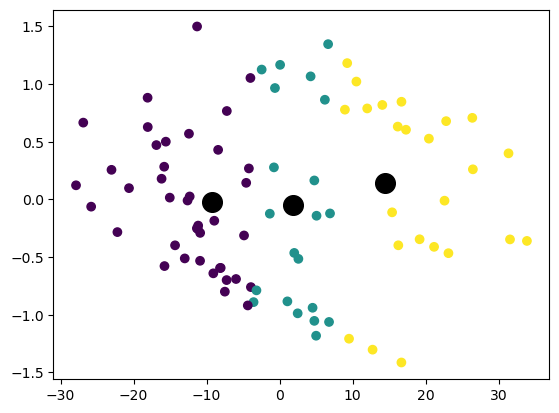

In [46]:
pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
    
meanshift = MeanShift().fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=meanshift.predict(pca_data))
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], c='black', s=200)
plt.show()

### Validación cruzada

- La última palabra siempre la tienen los datos, nuestra intuición no siempre va a jugar a favor
- Se debe tener mentalidad de testeo
- Todos los moedlos son malos, solamente que algunos resultan útiles

Para ello podemos usar:
- Hold-On partición de datos de test y train
  - Prototipado rápido
  - No se tiene mucho conocimiento
  - Poco poder de cómputo
- K-Folds
  - Recomendamble en la mayoría de los casos
  - Se cuenta con un buen equipo para ML
  - Se requiere la integración con técnixas de optimización paramétrica
  - Se tiene más tiempo para las pruebas
- LOOCV
  - Requiere gran poder computacional
  - Se cuentan con pocos datos como para dividir Train y Test
  - Cuando se quieren probar todos los casos posibles

#### K-Folds Cross Validation

In [47]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score

In [48]:
df_happy.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [49]:
X = df_happy.drop(["country", "score"], axis=1)
y = df_happy["score"]

In [50]:
tree = DecisionTreeRegressor()
score = cross_val_score(tree, X, y, cv=3, scoring="neg_mean_squared_error")
score

array([-0.83999198, -1.07019181, -4.99930473])

El score es un arreglo de errores negativos medios cuadrados (es decir, cuanto mas pequeño en valor absoluto, mejor se ajusta el modelo a los datos) como salida del coss_val_score, este resultado se da ya que el modelo fue separado cv veces (en este caso 5 al principio y luego 3) en set de datos de entrenamiento y prueba, en lo que se puede notar que particiones fueron mas satisfactorias. Ahora al aplicar el promedio y el valor absoluto, puedes observar el error medio cuadrado promedio calculado a partir de las salidas score que evalúan la adaptación promedio del modelo a los datos.

In [51]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
mse_values = []

for train, test in kf.split(df_happy):

    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]


    model = DecisionTreeRegressor().fit(X_train, y_train)
    predict = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, predict))

print("Los tres MSE fueron: ", mse_values)
print("El MSE promedio fue: ", np.mean(mse_values))

Los tres MSE fueron:  [0.00331594517456698, 0.14383285342456367, 0.01417298216821376]
El MSE promedio fue:  0.05377392692244814


### Optimización paramétrica

Familiarizados con el concepto de Cross Validation vamos a utilizar este mismo principio de fondo para lograr automatizar un poco la selección y optimización de nuestros modelos.

Problema: Parece que encontramos un modelo de aprendizaje que parece funcionar, pero esto puede implicar que ahora tenemos que encontrar la optimización de cada uno de los parámetros de este modelo, encontrar el que mejor se ajuste y el que mejor resultado nos de.

- Es facil perderse entre los conceptos de tantos parámetros. Tenemos flexibilidad para algoritmos básicos de Machine Learning, pero facil perderse.
- Es difícil medir la sensibilidad de los mismos manualmente.
- Es COSTOSO, en tiempo humano y computacionalmente.

Para solucionar esto se usa:

- Optimización manual
- GridSearchCV: Se definen las métricas y los rangos para encontrar la mejor combinación 
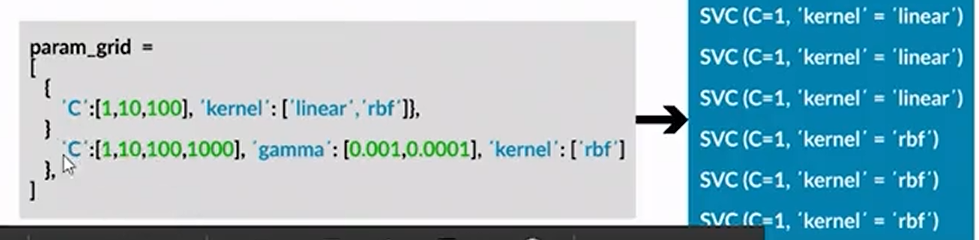
- RandomizedSearchCV

#### Implementando Randomized

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [57]:
X = df_happy.drop(["country", "rank", "score"], axis=1)
y = df_happy["score"]

In [59]:
reg = RandomForestRegressor()
params = {
    "n_estimators" : range(4, 16),
    "criterion" : ['squared_error', 'absolute_error'],
    "max_depth" : range(2, 11)
}

grid = RandomizedSearchCV(reg, params, n_iter=10, cv=3, scoring="neg_mean_absolute_error").fit(X, y)

In [60]:
grid.best_estimator_

RandomForestRegressor(max_depth=9, n_estimators=5)

In [61]:
grid.best_params_

{'n_estimators': 5, 'max_depth': 9, 'criterion': 'squared_error'}

In [64]:
grid.predict(X.loc[[0]])

array([7.50120001])

### Revisión de nuestra arquitectura de código

Ahora vamos a convertir los scripts que tenemos en un código que sea modular y extensible con facilidad para que nuestra arquitectura pueda salir a producción de una manera exitosa.

Una estructura de carpetas que sea organizada para poder gestionar todo lo que vas a necesitar en cualquier proceso de Machine Learning.

Carpetas:

in: Carpeta que contendrá archivos de entrada, datos que alimentarán a nuestros modelos.

out: Carpeta que contendrá el resultado de la exportacion de nuestros modelos, visualizaciones, datos en excel o csv, etc.

models: Carpeta que contedrá a los modelos.

Archivos: Cada clase será un archivo que tenga su propia responsabilidad y se encargue específicamente de una tareas concreta.

main.py: Metodo principal de ejecucion. Ejecutará todo el flujo de datos. Se encargaría de controlar el flujo de todo el código de principio a fin.

load.py: Archivo que se encarga de cargar los datos desde in o una DB

utils.py: Todos los metodos que se reutilizaran una y otra vez.

models.py: Irá toda la parte de ML como tal.